In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/machineLearning/projeler/manufacturing.csv")

In [ ]:
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [ ]:
df.describe()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000


In [ ]:
df.isnull().sum()

,0
Temperature (°C),0
Pressure (kPa),0
Temperature x Pressure,0
Material Fusion Metric,0
Material Transformation Metric,0
Quality Rating,0


In [ ]:
df.corr()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
Temperature (°C),1.000000,-0.024754,0.571743,0.974901,0.971210,-0.461279
Pressure (kPa),-0.024754,1.000000,0.773572,0.151095,-0.022862,0.013129
Temperature x Pressure,0.571743,0.773572,1.000000,0.694733,0.555579,-0.258474
Material Fusion Metric,0.974901,0.151095,0.694733,1.000000,0.976708,-0.511972
Material Transformation Metric,0.971210,-0.022862,0.555579,0.976708,1.000000,-0.575756
Quality Rating,-0.461279,0.013129,-0.258474,-0.511972,-0.575756,1.000000


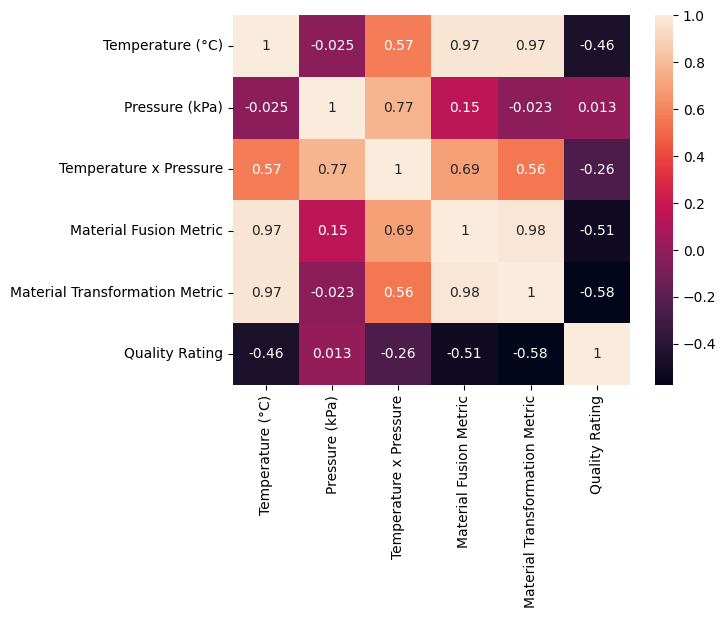

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

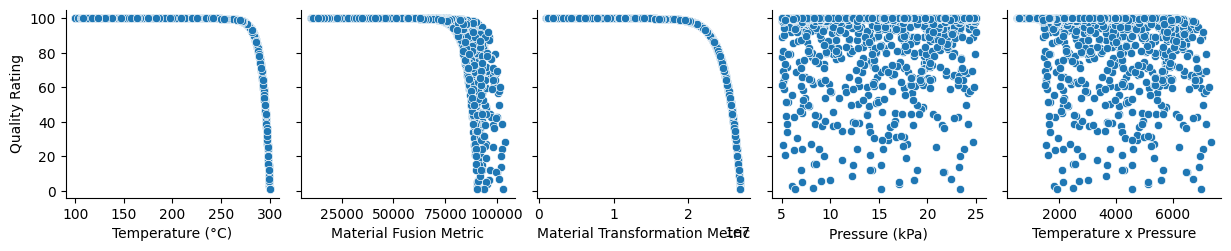

In [ ]:
sns.pairplot(df,x_vars=['Temperature (°C)','Material Fusion Metric','Material Transformation Metric', 'Pressure (kPa)', 'Temperature x Pressure'], y_vars='Quality Rating', kind = 'scatter')
plt.show()

In [ ]:
df_clean=df.drop(['Pressure (kPa)', 'Temperature x Pressure'],axis=1)

In [ ]:
df_clean.head()

,Temperature (°C),Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,44522.217074,9.229576e+06,99.999971
1,243.037873,63020.764997,1.435537e+07,99.985703
2,220.552675,49125.950249,1.072839e+07,99.999758
3,208.976637,57128.881547,9.125702e+06,99.999975
4,184.730960,38068.201283,6.303792e+06,100.000000


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Material Fusion Metric          3957 non-null   float64
 2   Material Transformation Metric  3957 non-null   float64
 3   Quality Rating                  3957 non-null   float64
dtypes: float64(4)
memory usage: 123.8 KB


In [ ]:
X=df_clean.drop('Quality Rating',axis=1)
y=df_clean['Quality Rating']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=15)

In [ ]:
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [ ]:
regression=LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred=regression.predict(X_test_poly)

In [ ]:
regression.coef_

array([ 0.00000000e+00,  1.10943498e+04, -9.58438321e-01, -1.17121260e+04,
        1.56302229e+03, -3.72416154e-01,  2.11141583e+03, -1.11376946e+00,
        3.12501027e+00, -5.15726186e+02])

In [ ]:
regression.intercept_

np.float64(-3003.371512315199)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 Score: ', score)

Mean Absolute Error:  2.328899553536605
Mean Squared Error:  10.022138942679302
R2 Score:  0.9282559720789809


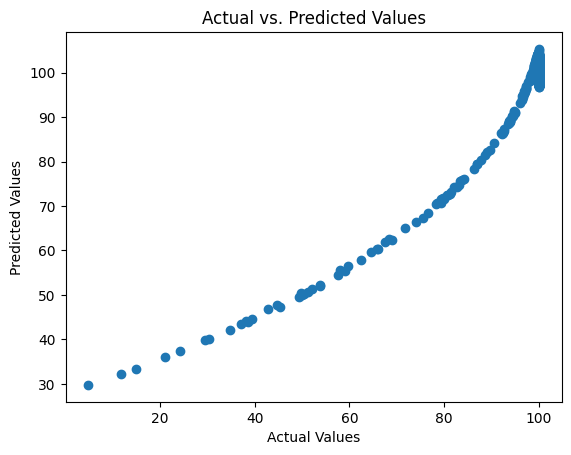

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()